In [1]:
%matplotlib widget

from datetime import datetime, timedelta
from pathlib import Path

import copy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from loader import Loader
lo = Loader()

from analyzer import Analyzer

# Load Files 

In [2]:
json_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%dT%H%M%S')
#json_timestamp_fnct = lambda x: datetime.strptime(x, '%Y%m%d_%H%M%S')
#csv_timestamp_fnct = lambda x: datetime.strptime(x, '%d.%m.%Y %H_%M_%S')
csv_timestamp_fnct = lambda x: datetime.strptime(x, '%m_%d_%Y %I_%M_%S %p')

parse_timestamp = True

attr_pattern_specs = {}
if parse_timestamp:
    attr_pattern_specs = {'timestamp':{'start':['^', '; '],
                                       'end':['_', ']'],
                                       'trans_fnct': [json_timestamp_fnct, csv_timestamp_fnct],
                                       'must_contain': ['.json', '.csv']
                                       }
                         }


In [3]:
# ============================= User input =============================
# Directory containing the measurement files
root = Path(r'/baltic/users/optolabdata/Experiments/EdwardHe/')
directory = root / Path(r'2023-10-03_cleansweep_5_first_IVs')

print(directory)

# Specify a pattern that the filename must contain. Only filenames containing the pattern will be loaded
must_contain = '.json'
escape = False                           

# Specify metadata attributes to be read out of filename. 
# The attribute name will be set to the dictionary key (e.g. meas_name)
# The attribute value will be set to the string between the two patterns
user_attr_patterns = {
    'meas_name': {'start': '_', 'end': '\.'},
    'cluster': {'start': '(c\d+x\d+)', 'end': '*'},
    'device': {'start': '(d\d+x\d+)', 'end': '*'}
}


# Example Regex: 'P=\w{1,3}_' (matches patterns: 'P=on_', 'P=0_', 'P=off_', 'P=170')
# Example Regex: 'd\d+x\d+_' (matches pattern: 'd10023x2346_')
# Example Regex: '_(?!(no|UV))' (matches patterns: '_lksjdflj' but not '_no' or '_UV')
# =====================================================================

/baltic/users/optolabdata/Experiments/EdwardHe/2023-10-03_cleansweep_5_first_IVs


In [4]:
attr_pattern_specs.update(user_attr_patterns)

lo.load_files(directory, must_contain=must_contain, attr_pattern_specs=attr_pattern_specs, escape=escape)

lo.print_files()

,filename,timestamp,meas_name,cluster,device
0,20231003T104607_cleansweep_5_dark_c1x4_d1x1.json,2023-10-03 10:46:07,cleansweep_5_dark_c1x4_d1x1,c1x4,d1x1
1,20231003T110257_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:02:57,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
2,20231003T110533_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:05:33,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
3,20231003T110607_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:06:07,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
4,20231003T110644_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:06:44,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
5,20231003T110711_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:07:11,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
6,20231003T110745_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:07:45,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
7,20231003T110818_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:08:18,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
8,20231003T111028_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:10:28,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
9,20231003T112846_cleansweep_5_dark_c1x4_d2x1.json,2023-10-03 11:28:46,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1


## Rename (in case you need to rename some files. Skip if not needed)

In [40]:
# Caution: changes filename of original file

# ============================= User input ============================= 
rename_selection = \
{
    42: '20220923T150602_cleansweep_4_dark_T=25_c2x1_d4x2.json',
    43: '20220923T150654_cleansweep_4_dark_T=25_c2x1_d4x2.json',
}
# ====================================================================== 

lo.rename_files(rename_selection)
lo.load_files(directory, must_contain=must_contain, attr_pattern_specs=attr_pattern_specs, escape=escape)

# Load Data

In [5]:
lo.load_raw_data()
an = Analyzer(lo, None)

# Clean Data 

## Remove 0 and set Start Time to 0

In [6]:
# Can remove a measurement if no data left
an.rm_zero(thr=5e-2)
all_measurements = list(an.measurements.keys())
selection = an.set_selection(all_measurements) 

In [7]:
value = 0
an.set_start_time_to_value_selection(value)

True

# Plot Data 

In [8]:
an.print_measurements()

,timestamp,meas_name,cluster,device
0,2023-10-03 10:46:07,cleansweep_5_dark_c1x4_d1x1,c1x4,d1x1
1,2023-10-03 11:02:57,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
2,2023-10-03 11:05:33,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
3,2023-10-03 11:06:07,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
4,2023-10-03 11:06:44,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
5,2023-10-03 11:07:11,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
6,2023-10-03 11:07:45,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
7,2023-10-03 11:08:18,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
8,2023-10-03 11:10:28,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1
9,2023-10-03 11:28:46,cleansweep_5_dark_c1x4_d2x1,c1x4,d2x1


## Simple example 

['Voltage', 'Current', 'Resistance', 'Time', 'Status', 'Source', 'Repeat']


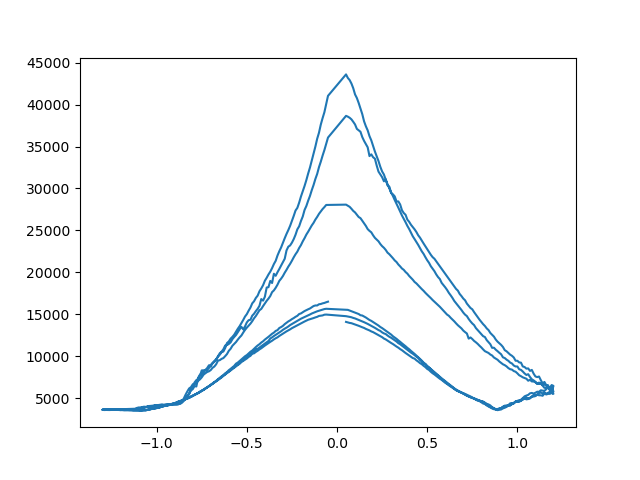

In [10]:
idx = 63

plt.figure()
  
data = an.measurements[idx]['data']

# List columns in dataframe
print(list(data.columns))

# Chose a column for x and y axis of the plot
plt.plot(data['Source'], data['Resistance'])

## Plot multiple measurements with legend 

In [12]:
selection = [64, 65, 66]
x_axis = 'Source'
y_axis = 'Resistance'

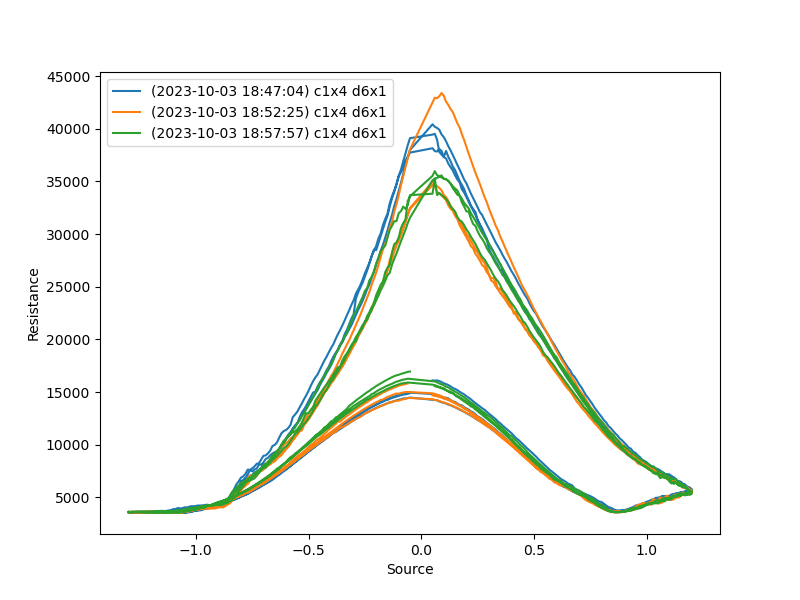

In [16]:
fig, ax = plt.subplots(figsize=(8,6))

for idx in selection:
    m = an.measurements[idx]
    data = m['data']
    meas_name = m['meas_name']
    timestamp = m['timestamp']
    device = m['device']
    cluster = m['cluster']
    label_string = f'({timestamp}) {meas_name}'
    
    # Uncomment to try out different auto labelling schemes
    #label_string = f'({timestamp}) {cluster} {device}'
    
    ax.plot(data[x_axis], data[y_axis], label=label_string)

ax.set_xlabel(x_axis)
ax.set_ylabel(y_axis)
# set yscale to log if needed
ax.set_yscale('linear')
ax.legend()